### 2022 Data Analysis ###

In [1]:
import pandas as pd
df = pd.read_csv('preprocessed_data.csv')
df.head(3)

,listing_id,id,date,reviewer_id,comments,SentenceLength,Year,detect,comments_token,comments_string
0,13913,451955791,2019-05-12,58728173,alinas place is cosy convenient and full of ec...,268,2019,en,"['alinas', 'place', 'cosy', 'convenient', 'ful...",alinas place cosy convenient full eclectic art...
1,13913,467269212,2019-06-10,2291517,alina was very quick to respond thoughtful and...,91,2019,en,"['alina', 'quick', 'respond', 'thoughtful', 'a...",alina quick respond thoughtful accommodating d...
2,13913,538005731,2019-09-29,7253695,alina is an amazing host who welcomed me warml...,152,2019,en,"['alina', 'amazing', 'host', 'welcomed', 'warm...",alina amazing host welcomed warmly always talk...


In [2]:
data_2022 = df[df["Year"]==2022]
data_2022.to_csv('data_2022.csv', index=False)

In [3]:
df_2022= pd.read_csv('data_2022.csv')
df_2022.head(3)

,listing_id,id,date,reviewer_id,comments,SentenceLength,Year,detect,comments_token,comments_string
0,13913,597622110054753727,2022-04-04,2941217,if the room is available just take it !,40,2022,en,"['room', 'available', 'take']",room available take
1,13913,628812668788849576,2022-05-17,32486646,alinas flat is lovely and quirky with art all ...,757,2022,en,"['alinas', 'flat', 'lovely', 'quirky', 'art', ...",alinas flat lovely quirky art around makes lov...
2,13913,631032182017371215,2022-05-20,203803703,this is the most cosy and beautifully-decorate...,199,2022,en,"['cosy', 'beautifully', 'decorated', 'flat', '...",cosy beautifully decorated flat lovely area al...


In [4]:
len(df_2022)

108926

In [5]:


## Analysis 2022 ##




In [6]:
# Create list of all words
all_words_22 = ' '.join([str(word) for word in df_2022['comments_string']])


In [7]:
# Tokenise all words 
import nltk
tokenized_words_22 = nltk.tokenize.word_tokenize(all_words_22)

In [8]:
# Frequency dstribution for all words 2022
import nltk
from nltk.probability import FreqDist
fdist_22 = FreqDist(tokenized_words_22)

In [9]:
df_2022.head(3)

,listing_id,id,date,reviewer_id,comments,SentenceLength,Year,detect,comments_token,comments_string
0,13913,597622110054753727,2022-04-04,2941217,if the room is available just take it !,40,2022,en,"['room', 'available', 'take']",room available take
1,13913,628812668788849576,2022-05-17,32486646,alinas flat is lovely and quirky with art all ...,757,2022,en,"['alinas', 'flat', 'lovely', 'quirky', 'art', ...",alinas flat lovely quirky art around makes lov...
2,13913,631032182017371215,2022-05-20,203803703,this is the most cosy and beautifully-decorate...,199,2022,en,"['cosy', 'beautifully', 'decorated', 'flat', '...",cosy beautifully decorated flat lovely area al...


In [10]:
# Lemmanisation

nltk.download('wordnet')
nltk.download('omw-1.4')
 
from nltk.stem import WordNetLemmatizer
 
wordnet_lem = WordNetLemmatizer()

df_2022['comments_string'] = df_2022['comments_string'].astype(str)
df_2022['comments_string_lem'] = df_2022['comments_string'].apply(wordnet_lem.lemmatize)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lucywalker/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/lucywalker/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [11]:
df_2022.head(3)

,listing_id,id,date,reviewer_id,comments,SentenceLength,Year,detect,comments_token,comments_string,comments_string_lem
0,13913,597622110054753727,2022-04-04,2941217,if the room is available just take it !,40,2022,en,"['room', 'available', 'take']",room available take,room available take
1,13913,628812668788849576,2022-05-17,32486646,alinas flat is lovely and quirky with art all ...,757,2022,en,"['alinas', 'flat', 'lovely', 'quirky', 'art', ...",alinas flat lovely quirky art around makes lov...,alinas flat lovely quirky art around makes lov...
2,13913,631032182017371215,2022-05-20,203803703,this is the most cosy and beautifully-decorate...,199,2022,en,"['cosy', 'beautifully', 'decorated', 'flat', '...",cosy beautifully decorated flat lovely area al...,cosy beautifully decorated flat lovely area al...


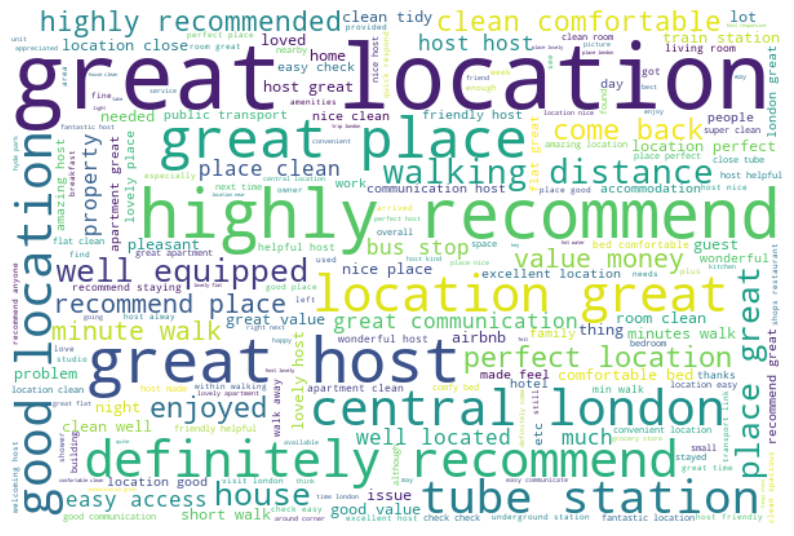

In [12]:
# Word Cloud 2022

all_words_lem_22 = ' '.join([word for word in df_2022['comments_string_lem']])

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2,
                     background_color='white',
                     max_font_size=100).generate(all_words_lem_22)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [13]:
## Add polarity scores to df_2022 - sentiment analysis 

from textblob import TextBlob

df_2022['polarity'] = df_2022['comments'].apply(lambda x: TextBlob(x).polarity)
df_2022.head(3)

,listing_id,id,date,reviewer_id,comments,SentenceLength,Year,detect,comments_token,comments_string,comments_string_lem,polarity
0,13913,597622110054753727,2022-04-04,2941217,if the room is available just take it !,40,2022,en,"['room', 'available', 'take']",room available take,room available take,0.500000
1,13913,628812668788849576,2022-05-17,32486646,alinas flat is lovely and quirky with art all ...,757,2022,en,"['alinas', 'flat', 'lovely', 'quirky', 'art', ...",alinas flat lovely quirky art around makes lov...,alinas flat lovely quirky art around makes lov...,0.328947
2,13913,631032182017371215,2022-05-20,203803703,this is the most cosy and beautifully-decorate...,199,2022,en,"['cosy', 'beautifully', 'decorated', 'flat', '...",cosy beautifully decorated flat lovely area al...,cosy beautifully decorated flat lovely area al...,0.482143


In [14]:
df_2022["polarity"].mean()

0.4127908269091738

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lucywalker/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


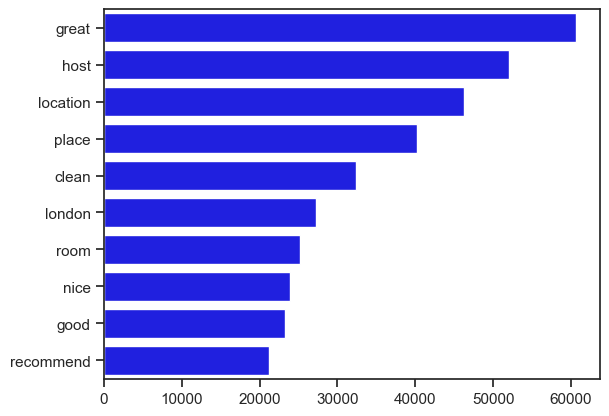

In [15]:
# Frequency Distributions

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem_22)
fd_22 = FreqDist(words)

# Obtain top 10 words
top_10_22 = fd_22.most_common(10)

# Create pandas series to make plotting easier
fdist_22 = pd.Series(dict(top_10_22))

import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist_22.index, x=fdist_22.values, color='blue');

In [16]:
print(top_10_22)

[('great', 60680), ('host', 51973), ('location', 46312), ('place', 40219), ('clean', 32315), ('london', 27247), ('room', 25123), ('nice', 23924), ('good', 23253), ('recommend', 21207)]


In [17]:
#create df for frequency
df_22_freq = pd.DataFrame({'col':top_10_22})
print (df_22_freq)

                  col
0      (great, 60680)
1       (host, 51973)
2   (location, 46312)
3      (place, 40219)
4      (clean, 32315)
5     (london, 27247)
6       (room, 25123)
7       (nice, 23924)
8       (good, 23253)
9  (recommend, 21207)


In [18]:
df_2022[df_2022['polarity']>0].count()

listing_id             106191
id                     106191
date                   106191
reviewer_id            106191
comments               106191
SentenceLength         106191
Year                   106191
detect                 106191
comments_token         106191
comments_string        106191
comments_string_lem    106191
polarity               106191
dtype: int64

In [19]:
df_2022[df_2022['polarity']<0].count()

listing_id             2001
id                     2001
date                   2001
reviewer_id            2001
comments               2001
SentenceLength         2001
Year                   2001
detect                 2001
comments_token         2001
comments_string        2001
comments_string_lem    2001
polarity               2001
dtype: int64

In [20]:
df_2022[df_2022['polarity']==0].count()

listing_id             734
id                     734
date                   734
reviewer_id            734
comments               734
SentenceLength         734
Year                   734
detect                 734
comments_token         734
comments_string        734
comments_string_lem    734
polarity               734
dtype: int64

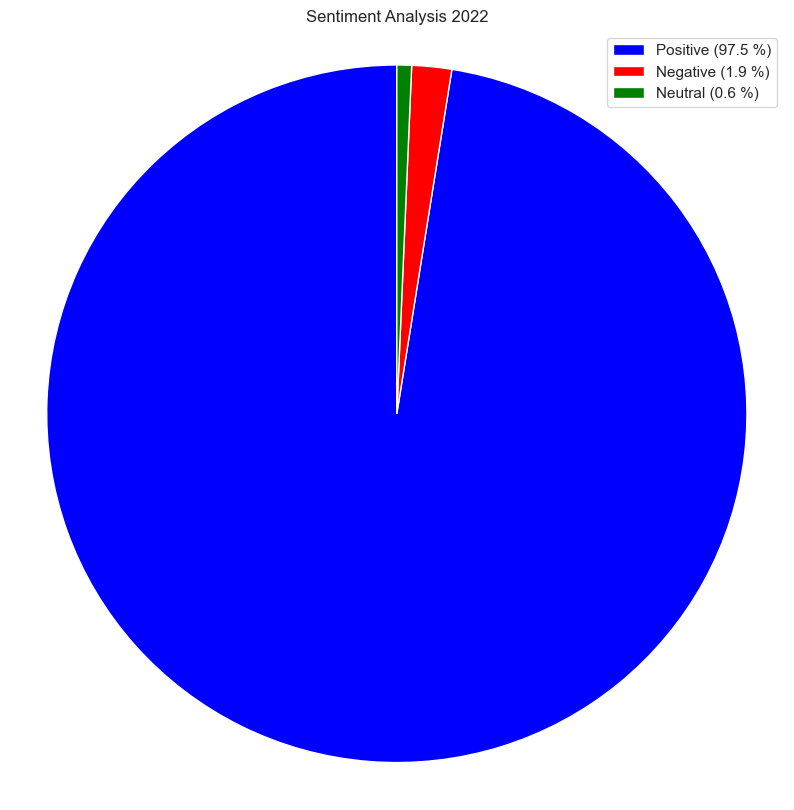

In [21]:
import matplotlib.pyplot as plt
 
data = [106181, 2002, 737]
label = ['Positive', 'Negative', 'Neutral']

labels = [r'Positive (97.5 %)', r'Negative (1.9 %)', r'Neutral (0.6 %)']
colours = ['blue', 'red', 'green']

plt.figure(figsize=(10,10))
plt.pie(data,labels=None, colors = colours, startangle=90)
plt.title('Sentiment Analysis 2022')
plt.legend(labels, loc="best")


plt.axis('equal')
plt.show()

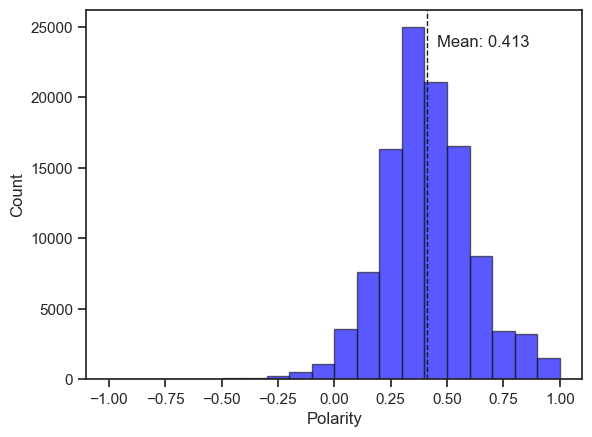

In [22]:
Histogram_22 = plt.hist(df_2022["polarity"], bins=20, color='blue', edgecolor='k', alpha=0.65)
plt.axvline(df_2022["polarity"].mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(df_2022["polarity"].mean()*1.1, max_ylim*0.9, 'Mean: {:.3f}'.format(df_2022["polarity"].mean()))

plt.xlabel("Polarity")
plt.ylabel("Count")
plt.title = ('Polarity Scores 2022') 

In [23]:
## Add Subjectivity scores to df_2022  

sub = lambda x: TextBlob(x).sentiment.subjectivity
df_2022['subjectivity'] = df_2022['comments'].apply(sub)
df_2022.head(3)

,listing_id,id,date,reviewer_id,comments,SentenceLength,Year,detect,comments_token,comments_string,comments_string_lem,polarity,subjectivity
0,13913,597622110054753727,2022-04-04,2941217,if the room is available just take it !,40,2022,en,"['room', 'available', 'take']",room available take,room available take,0.500000,0.400000
1,13913,628812668788849576,2022-05-17,32486646,alinas flat is lovely and quirky with art all ...,757,2022,en,"['alinas', 'flat', 'lovely', 'quirky', 'art', ...",alinas flat lovely quirky art around makes lov...,alinas flat lovely quirky art around makes lov...,0.328947,0.611842
2,13913,631032182017371215,2022-05-20,203803703,this is the most cosy and beautifully-decorate...,199,2022,en,"['cosy', 'beautifully', 'decorated', 'flat', '...",cosy beautifully decorated flat lovely area al...,cosy beautifully decorated flat lovely area al...,0.482143,0.630714


/Users/lucywalker/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

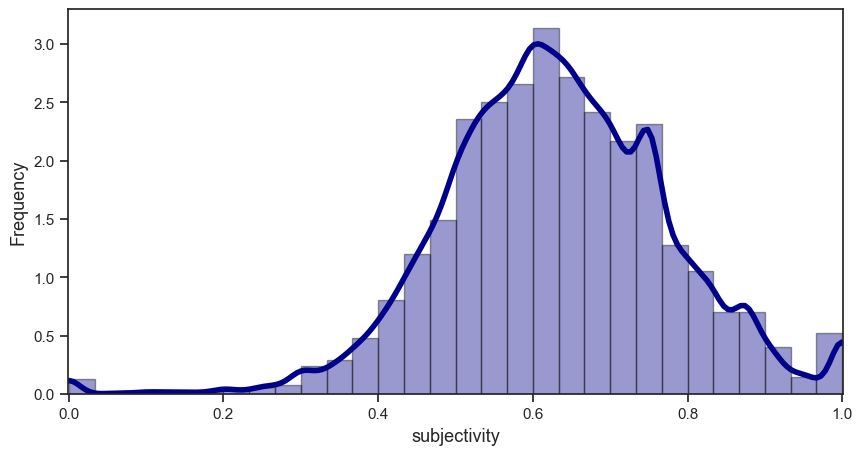

In [24]:
# Subjectivity Histogram

plt.figure(figsize=(10,5))
sns.distplot(df_2022['subjectivity'], hist=True, kde=True,
bins=int(30), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)


In [25]:
df_2022["subjectivity"].mean()

0.6293091276085853

In [26]:
# Forming N Grams function

import re
from nltk.util import ngrams
from collections import Counter
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)


In [27]:
# Plotting N Grams function

def plotNgrams(documents):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5)
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5)
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()
    
plotNgrams

<function __main__.plotNgrams(documents)>

In [28]:
def textTrends(documents):
    plotNgrams(documents)


In [29]:
# Determining Sentiment

posReviews_2022 = df_2022[df_2022['polarity'] > 0]
negReviews_2022 = df_2022[df_2022['polarity'] < 0]

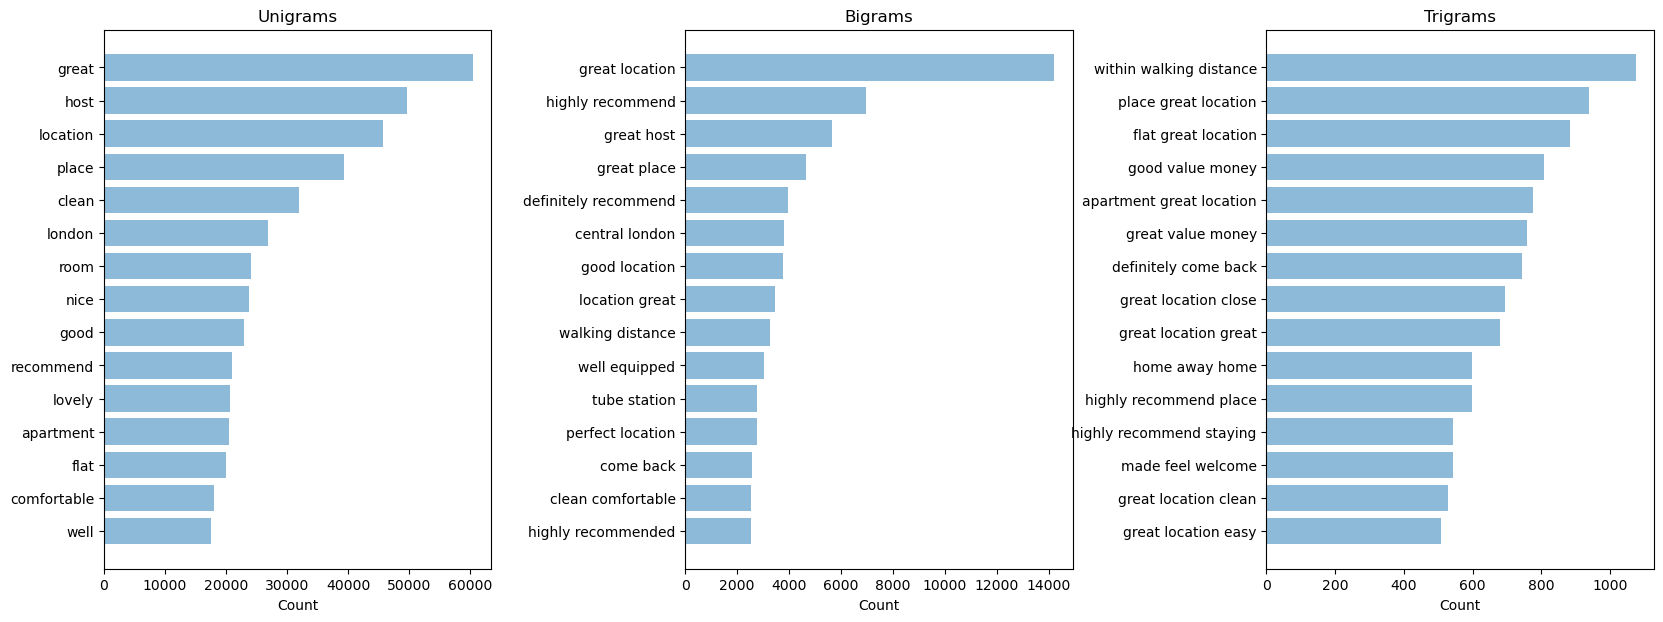

In [30]:
# Bigrams of positive reviews

textTrends(posReviews_2022['comments_string_lem'])

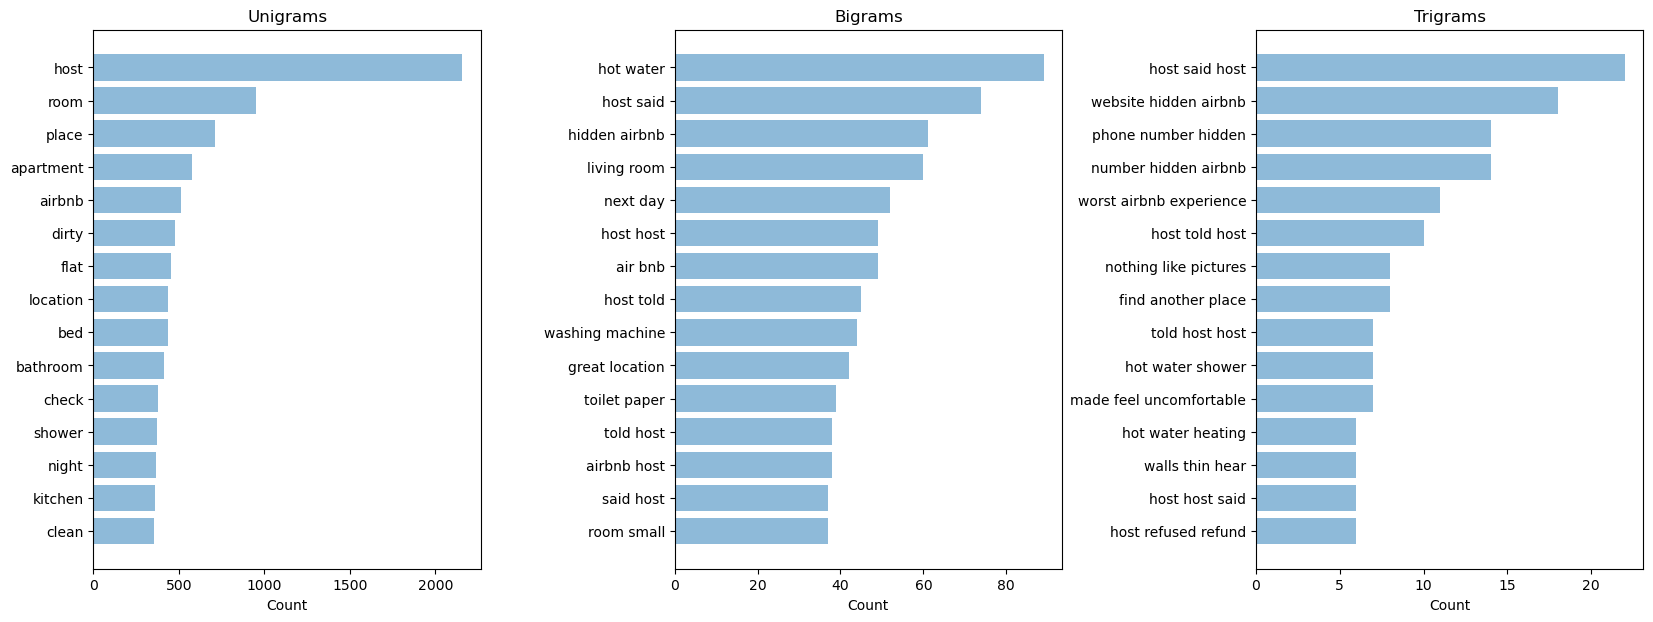

In [31]:
# Bigrams of negative reviews

textTrends(negReviews_2022['comments_string_lem'])